In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [79]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [80]:
train.head() 
# survive = 0 : No, survive = 1 : Yes
# Sib Sp -> 사람과 같이 탔는지
# Parch -> 부모님/자식과 같이 탔는지

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [81]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [82]:
train.info()   # Non-Null Count가 모든 컬럼에서 같아야 함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**__Visualization__**  
--------

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [85]:
#특징에 따라 살아남은 비율을 확인할 수 있는 가시화 함수
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

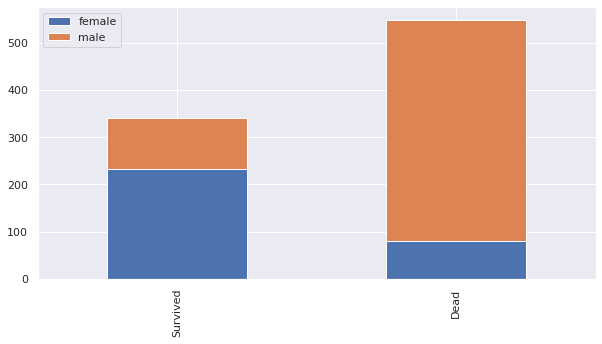

In [86]:
bar_chart('Sex')   # 여자들은 살아남을 확률이 높았다

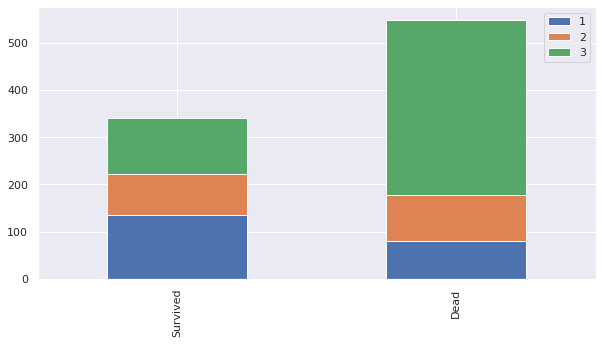

In [87]:
bar_chart('Pclass')   # 3등급칸의 사람들은 살아남을 확률이 낮다.

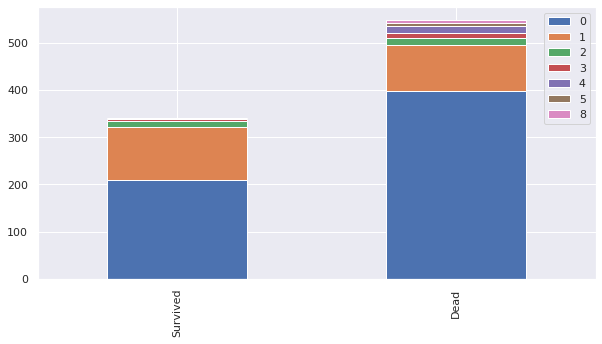

In [88]:
bar_chart('SibSp')

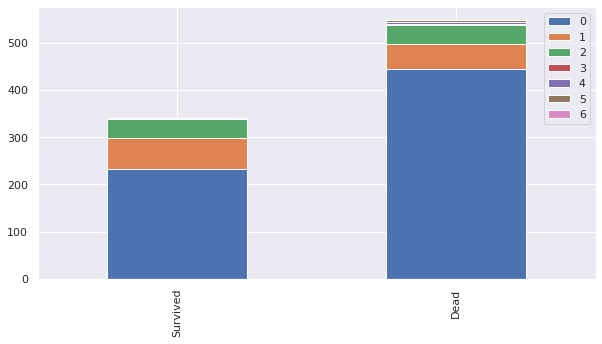

In [89]:
bar_chart('Parch')

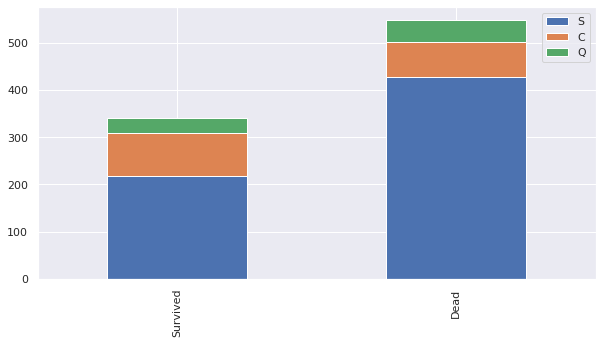

In [90]:
bar_chart('Embarked')

**__Feature Engineering__**  
--------

* 컬럼들을 vector화 시킴 (전부 숫자로 변경)   
* NaN 처리 수행

In [91]:
# Name 처리
# 이름에서 Mr, Mrs 등의 타이틀 정보만 추출할 것임

train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [92]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Countess      1
Lady          1
Ms            1
Sir           1
Jonkheer      1
Capt          1
Mme           1
Name: Title, dtype: int64

In [93]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [94]:
# Mr: 0, Miss: 1, Mrs: 2, Others: 3으로 숫자화

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [95]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [96]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

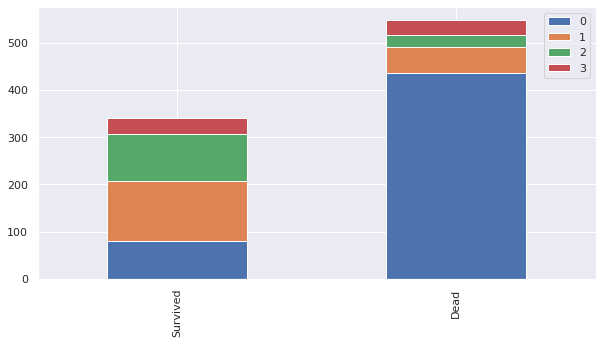

In [97]:
bar_chart('Title')

In [98]:
# 불필요한 컬럼 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [99]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [100]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

In [101]:
# 성별 처리 (male: 0, female: 1)

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [102]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

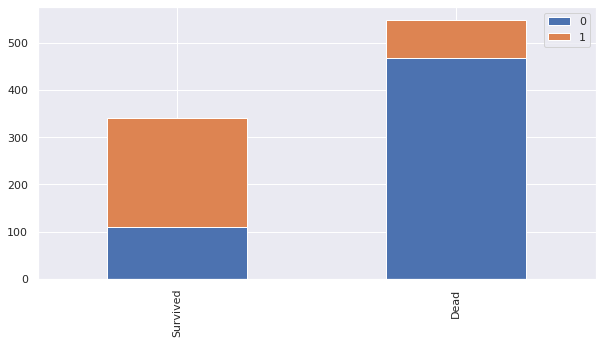

In [103]:
bar_chart('Sex')

In [104]:
# 나이 처리 (NaN 처리)
# 같은 타이틀에 속하는 사람들의 평균 나이로 NaN 처리 수행

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

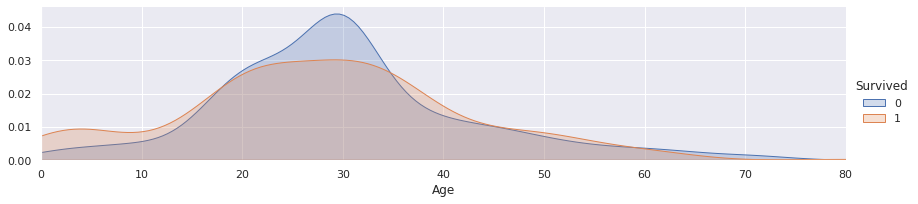

In [105]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

In [106]:
# child: 0, young: 1, adult: 2, mid-age: 3, senior: 4로 구분하기


#for dataset in train_test_data:
#    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

<AxesSubplot:>

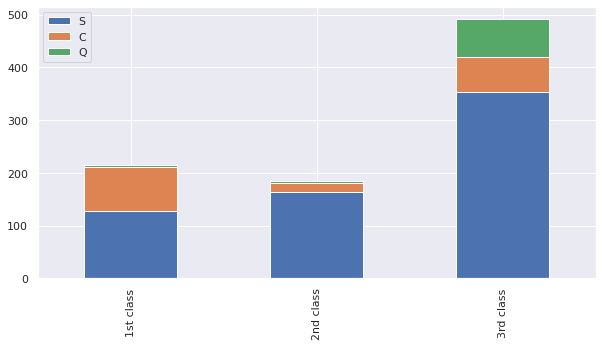

In [107]:
# Embarked  (--> 배 어디서 탔는지!)

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [108]:
# S가 가장 많으니까, NaN 값에 S를 넣을 것임!
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


In [109]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [110]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [111]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN         0      0  
1  71.2833   C85         1      2  
2   7.9250   NaN         0      1  
3  53.1000  C123         0      2  
4   8.0500   NaN         0      0

In [112]:
# Fare  ( --> NaN 값을 Pclass의 중앙값으로 변경!)

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

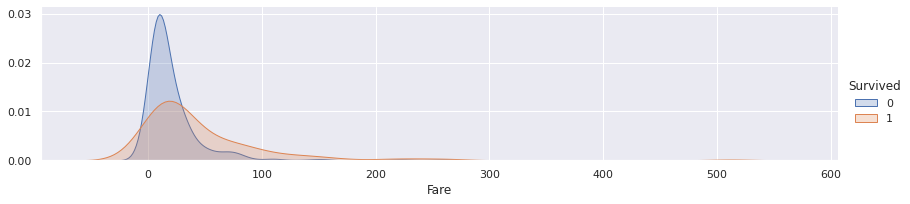

In [113]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.add_legend()

plt.show()

In [117]:
# Cabin  (--> 호텔의 방 같은 개념)
# 첫 알파벳만 따서 숫자형으로 변경할 예정

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

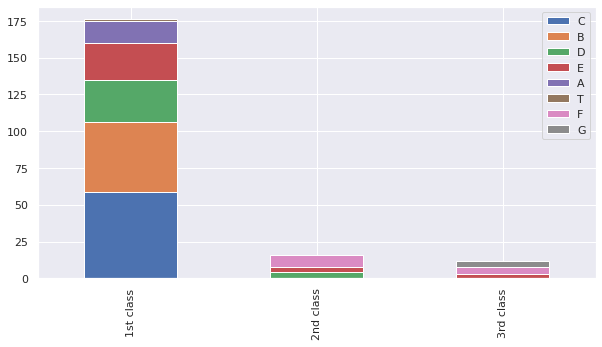

In [118]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [119]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [120]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare  Cabin  Embarked  Title  
0   7.2500    NaN         0      0  
1  71.2833    0.8         1      2  
2   7.9250    NaN         0      1  
3  53.1000    0.8         0      2  
4   8.0500    NaN         0      0

In [121]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare  Cabin  Embarked  Title  
0   7.2500    2.0         0      0  
1  71.2833    0.8         1      2  
2   7.9250    2.0         0      1  
3  53.1000    0.8         0      2  
4   8.0500    2.0         0      0

(0.0, 11.0)

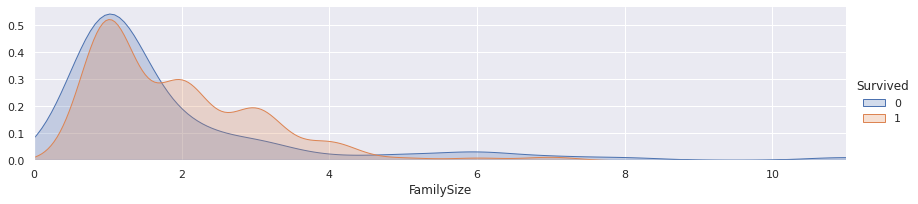

In [122]:
# Family Size

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [123]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4:1.2, 5: 1.6, 6:2, 7:2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [124]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare  Cabin  Embarked  Title  FamilySize  
0   7.2500    2.0         0      0         0.4  
1  71.2833    0.8         1      2         0.4  
2   7.9250    2.0         0      1         0.0  
3  53.1000    0.8         0      2         0.4  
4   8.0500    2.0         0      0         0.0

In [126]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [127]:
train_data.head(10)

Pclass  Sex   Age     Fare  Cabin  Embarked  Title  FamilySize
0       3    0  22.0   7.2500    2.0         0      0         0.4
1       1    1  38.0  71.2833    0.8         1      2         0.4
2       3    1  26.0   7.9250    2.0         0      1         0.0
3       1    1  35.0  53.1000    0.8         0      2         0.4
4       3    0  35.0   8.0500    2.0         0      0         0.0
5       3    0  30.0   8.4583    2.0         2      0         0.0
6       1    0  54.0  51.8625    1.6         0      0         0.0
7       3    0   2.0  21.0750    2.0         0      3         1.6
8       3    1  27.0  11.1333    2.0         0      2         0.8
9       2    1  14.0  30.0708    1.8         1      2         0.4

**__Modeling__**  
--------

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

* Cross Validation (K-fold)

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

* kNN

In [132]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
print(score)

[0.7        0.79775281 0.70786517 0.66292135 0.69662921 0.73033708
 0.75280899 0.73033708 0.71910112 0.74157303]


In [133]:
round(np.mean(score)*100, 2)

72.39

* Random Forest

In [134]:
rf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(rf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.82022472 0.83146067 0.78651685 0.83146067 0.84269663
 0.76404494 0.80898876 0.79775281 0.82022472]


In [135]:
round(np.mean(score)*100,2)

80.92

* Naive Bayes

In [137]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.75280899 0.76404494 0.75280899 0.73033708 0.83146067
 0.80898876 0.82022472 0.82022472 0.83146067]


In [138]:
round(np.mean(score)*100,2)

79.23

SVM

In [139]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.65555556 0.76404494 0.68539326 0.57303371 0.76404494 0.70786517
 0.66292135 0.68539326 0.60674157 0.62921348]


In [140]:
round(np.mean(score)*100,2)

67.34

Forecast (Testing) --> RandomForest 사용!

In [142]:
rf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = rf.predict(test_data)